**Clustering avec Kmeans**

Les données à regrouper

In [41]:
import pandas as pd

df_employes=pd.DataFrame([[1200,25],
                 [1300,27],
                 [1100,27],
                 [2500,49],
                 [2400,47],
                 [2600,45]], 
                 columns=['salaire','age'])
                 
df_employes

,salaire,age
0,1200,25
1,1300,27
2,1100,27
3,2500,49
4,2400,47
5,2600,45


Apprentissage avec Kmeans

[[2500.           47.        ]
 [1200.           26.33333333]]


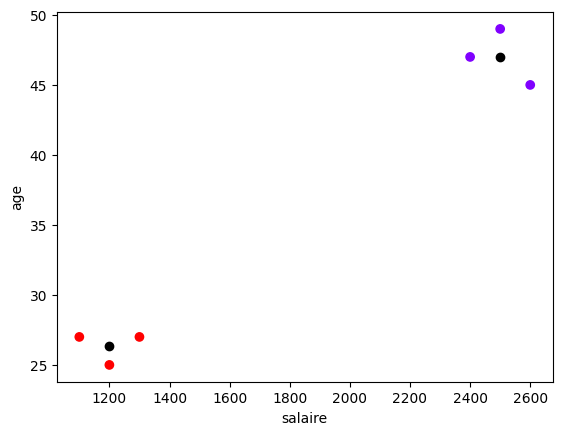

In [42]:
# import sklearn and kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
km = KMeans(n_clusters=2, random_state=0).fit(df_employes)
centroids = km.cluster_centers_
print(centroids)

# plot the data
plt.scatter(df_employes['salaire'], df_employes['age'], c=km.labels_, cmap='rainbow')
plt.scatter(centroids[:,0] ,centroids[:,1], color='black')
plt.xlabel('salaire')
plt.ylabel('age')
plt.show()

Test avec donénes de test

In [43]:
employe_new=pd.DataFrame([[1300.67,28]], columns=['salaire','age'])
employe_new

,salaire,age
0,1300.67,28


In [44]:
labels=km.predict(df_employes)
km.cluster_centers_

array([[2500.        ,   47.        ],
       [1200.        ,   26.33333333]])

In [45]:
employe_new=pd.DataFrame([[1900.67,40]], columns=['salaire','age'])
employe_new

,salaire,age
0,1900.67,40


**Clustering des données réelles**

In [47]:
#from google.colab import drive
#drive.mount('/content/drive')

In [48]:
#implementation of csv file
data_path = './employes.csv'

Charger les données CSV employes.csv à partir de Google Drive

In [77]:
df_employes=pd.read_csv(data_path, index_col=0, header=0)
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


Transformer les données de format brute en format numérique

In [78]:
#make a copy of the data
df_employes_copy=df_employes.copy()

In [79]:
#convert date to datetime format 
df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
df_employes_copy

C:\Users\msi\AppData\Local\Temp\ipykernel_8184\1354682102.py:2: UserWarning: Parsing '20/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
C:\Users\msi\AppData\Local\Temp\ipykernel_8184\1354682102.py:2: UserWarning: Parsing '30/11/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
C:\Users\msi\AppData\Local\Temp\ipykernel_8184\1354682102.py:2: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
C:\Users\msi\AppData\Local\Temp\ipykernel_8184\1354682102.py:2: UserWarning: Parsing '19/02/1999' in DD/MM/YYYY format. Provide forma

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,2018-10-20
Sonia,2800.786,400.876,marie,2005-11-30
Rahma,NaN,130.987,celibataire,2017-04-02
Salma,2500.876,340.600,marie,2010-03-02
Ahmed,3100.760,NaN,marie,2004-09-09
Saleh,1300.876,150.900,celibataire,2017-01-01
Ameni,1100.660,130.870,celibataire,2019-11-05
Mehdi,3000.760,NaN,marie,2000-07-07
Salem,1505.760,159.700,celibataire,2017-11-21


In [80]:
#fill missing values with mean
#df_employes_copy['salaire'].fillna(df_employes_copy['salaire'].mean(), inplace=True)
df_employes_copy.fillna({'salaire':df_employes_copy['salaire'].mean(),
'prime':df_employes_copy['prime'].mean()}, inplace=True)
df_employes_copy

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20
Sonia,2800.786000,400.876000,marie,2005-11-30
Rahma,2192.082091,130.987000,celibataire,2017-04-02
Salma,2500.876000,340.600000,marie,2010-03-02
Ahmed,3100.760000,257.165889,marie,2004-09-09
Saleh,1300.876000,150.900000,celibataire,2017-01-01
Ameni,1100.660000,130.870000,celibataire,2019-11-05
Mehdi,3000.760000,257.165889,marie,2000-07-07
Salem,1505.760000,159.700000,celibataire,2017-11-21


In [81]:
from datetime import datetime
# caluler l'ancienneté et ajouter une colonne
df_employes_copy['anciennete']=df_employes_copy['date recrutement'].apply(lambda x: datetime.now().year - x.year)
df_employes_copy

,salaire,prime,etat civil,date recrutement,anciennete
nom,,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20,4
Sonia,2800.786000,400.876000,marie,2005-11-30,17
Rahma,2192.082091,130.987000,celibataire,2017-04-02,5
Salma,2500.876000,340.600000,marie,2010-03-02,12
Ahmed,3100.760000,257.165889,marie,2004-09-09,18
Saleh,1300.876000,150.900000,celibataire,2017-01-01,5
Ameni,1100.660000,130.870000,celibataire,2019-11-05,3
Mehdi,3000.760000,257.165889,marie,2000-07-07,22
Salem,1505.760000,159.700000,celibataire,2017-11-21,5


In [82]:
df_employes_copy.drop(['date recrutement'], axis=1, inplace=True)
df_employes_copy

,salaire,prime,etat civil,anciennete
nom,,,,
Ali,1200.675000,100.560000,celibataire,4
Sonia,2800.786000,400.876000,marie,17
Rahma,2192.082091,130.987000,celibataire,5
Salma,2500.876000,340.600000,marie,12
Ahmed,3100.760000,257.165889,marie,18
Saleh,1300.876000,150.900000,celibataire,5
Ameni,1100.660000,130.870000,celibataire,3
Mehdi,3000.760000,257.165889,marie,22
Salem,1505.760000,159.700000,celibataire,5


In [83]:
from sklearn.preprocessing import OneHotEncoder
# convert categorical data to numerical data
OHE=OneHotEncoder().fit(df_employes_copy[['etat civil']])  
OHE.categories_ 

[array(['celibataire', 'marie'], dtype=object)]

In [84]:
etat_civil_sparse=OHE.transform(df_employes_copy[['etat civil']])
etat_civil = etat_civil_sparse.toarray()
etat_civil

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [85]:
df_etat_civil=pd.DataFrame(etat_civil,index=df_employes_copy.index ,columns=['etat civil_celibataire','etat civil_marie'])
df_employes_copy=pd.concat([df_employes_copy,df_etat_civil], axis=1)
df_employes_copy.drop(['etat civil'], axis=1, inplace=True)
df_employes_copy

,salaire,prime,anciennete,etat civil_celibataire,etat civil_marie
nom,,,,,
Ali,1200.675000,100.560000,4,1.0,0.0
Sonia,2800.786000,400.876000,17,0.0,1.0
Rahma,2192.082091,130.987000,5,1.0,0.0
Salma,2500.876000,340.600000,12,0.0,1.0
Ahmed,3100.760000,257.165889,18,0.0,1.0
Saleh,1300.876000,150.900000,5,1.0,0.0
Ameni,1100.660000,130.870000,3,1.0,0.0
Mehdi,3000.760000,257.165889,22,0.0,1.0
Salem,1505.760000,159.700000,5,1.0,0.0


Normaliser les données

In [86]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler() #instancier l'objet StandardScaler varinace=1 et moyenne=0
ss.fit(df_employes_copy) # X_ is the data without the target
X_ss=ss.transform(df_employes_copy) 
X_ss

array([[-1.1511497 , -1.26411237, -0.97166562,  1.        , -1.        ],
       [ 0.70678264,  1.1600185 ,  0.48583281, -1.        ,  1.        ],
       [ 0.        , -1.01850764, -0.85955036,  1.        , -1.        ],
       [ 0.358549  ,  0.67347462, -0.07474351, -1.        ,  1.        ],
       [ 1.0550906 ,  0.        ,  0.59794807, -1.        ,  1.        ],
       [-1.0348036 , -0.85777122, -0.85955036,  1.        , -1.        ],
       [-1.26727984, -1.01945206, -1.08378088,  1.        , -1.        ],
       [ 0.93897789,  0.        ,  1.04640913, -1.        ,  1.        ],
       [-0.79690722, -0.7867382 , -0.85955036,  1.        , -1.        ],
       [ 0.59014045,  1.15294749,  1.15852439, -1.        ,  1.        ],
       [-1.15079556,  0.        , -0.63531983,  1.        , -1.        ],
       [ 1.75139534,  1.96014087,  2.05544651, -1.        ,  1.        ]])

Réduire les dimensions des données

In [87]:
# réduire la dimensionnalité avec PCA 
from sklearn.decomposition import PCA  
pca = PCA(n_components=2)
pca.fit(X_ss)
X_pca=pca.transform(X_ss)
X_pca

array([[-2.40254573, -0.21260843],
       [ 1.94104291,  0.13336802],
       [-1.73359756, -0.29367583],
       [ 1.32591667, -0.29059585],
       [ 1.65300564, -0.84805555],
       [-2.12706805,  0.10410078],
       [-2.40068748, -0.01507993],
       [ 1.80315582, -0.71309448],
       [-1.99062368,  0.09796294],
       [ 2.18893613,  0.31516948],
       [-1.71255885,  0.86438558],
       [ 3.45502417,  0.85812327]])

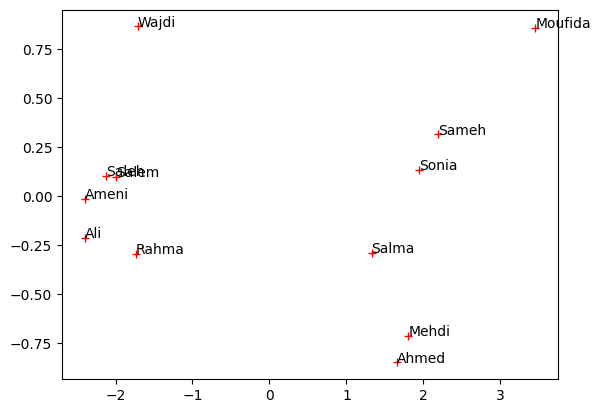

In [98]:
import matplotlib.pyplot as plt
plt.plot(X_pca[:,0], X_pca[:,1], 'r+')
for nom,x,y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
    plt.annotate(nom,xy=(x,y),xycoords="data")

Regrouper les données clusters avec Kmeans

In [99]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(X_pca)
km.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

Prédire les labels des clusters

In [100]:
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


In [101]:
labels=km.predict(X_pca)
labels

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

Déterminer les clusters

In [102]:
cluster0=X_pca[labels==0,:]
cluster1=X_pca[labels==1,:]


Visualiser les données sur un plan 2D colorées selon leurs appartenances aux clusters

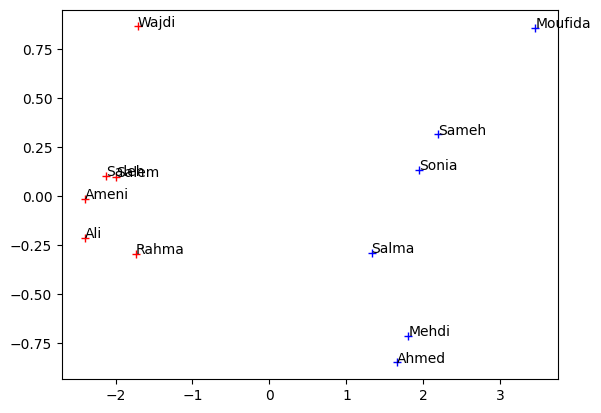

In [103]:
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'r+', label='Cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'b+', label='Cluster 1')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

In [ ]:
df_new=pd.DataFrame([[3200,25,500,'marie','20/20/1990']], 
                    columns=['salaire','age','etat civil'])

In [ ]:
#create a copy 